<a href="https://colab.research.google.com/github/WeegorMartins/Previsao-cor-da-cerveja/blob/main/Modelo_de_Previs%C3%A3o_da_cor_da_cerveja_AMSTEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold



data = pd.read_csv('Heineken - Data Science Use Case.csv', sep=',')


In [ ]:
data.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,...,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.0200,AMST
1,1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,...,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.0200,AMST
2,2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,...,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.0200,AMST
3,3,2449960768,10/25/2020 17:38,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,...,NaN,14.855308,14.353551,3935.575,883.650,14.494583,908.375,6.1275,6.5575,HNK
4,4,2449960799,10/25/2020 19:33,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,...,NaN,15.270026,13.847422,3717.350,824.525,14.494583,908.375,6.5575,6.1275,HNK


In [ ]:
desc_stats = data.describe()
print(desc_stats)


       Unnamed: 0        Job ID  Roast amount (kg)  1st malt amount (kg)  \
count  200.000000  2.000000e+02         197.000000            200.000000   
mean    99.500000  2.449966e+09          37.419826          14203.101661   
std     57.879185  3.027041e+03          17.929673           2679.696779   
min      0.000000  2.449960e+09          17.415013              0.000000   
25%     49.750000  2.449963e+09          23.327513          12652.634520   
50%     99.500000  2.449966e+09          27.627513          14030.222875   
75%    149.250000  2.449969e+09          53.965013          14088.200175   
max    199.000000  2.449971e+09          88.042526          24607.287500   

       2nd malt amount (kg)  MT - Temperature     MT - Time  WK - Temperature  \
count            200.000000        200.000000    200.000000        200.000000   
mean            6398.486726         67.885580   6753.279000        105.245337   
std             2036.306904          2.812810    430.184136          0.5

In [ ]:
data = data[data['Product'] == 'AMST']
data.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,...,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.02,AMST
1,1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,...,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.02,AMST
2,2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,...,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.02,AMST
8,8,2449961201,10/26/2020 18:46,64.392526,16087.64375,4010.975385,66.901670,6708.000,105.168039,7245.50,...,NaN,14.656477,18.693288,3630.275,870.750,14.494583,908.375,6.1275,6.02,AMST
9,9,2449961221,10/26/2020 20:24,64.177513,16092.75000,4012.168750,67.002759,6526.325,105.133183,6686.50,...,NaN,14.653028,18.176702,3136.850,740.675,14.494583,908.375,6.1275,6.02,AMST


In [ ]:
data = data.iloc[:, 1:]
data.head()

,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,WK - Time,...,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,2449959642,10/22/2020 2:50,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,6365.075,...,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.02,AMST
1,2449959689,10/22/2020 5:44,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,5929.700,...,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.02,AMST
2,2449959720,10/22/2020 7:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,6366.150,...,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.02,AMST
8,2449961201,10/26/2020 18:46,64.392526,16087.64375,4010.975385,66.901670,6708.000,105.168039,7245.50,7046.625,...,NaN,14.656477,18.693288,3630.275,870.750,14.494583,908.375,6.1275,6.02,AMST
9,2449961221,10/26/2020 20:24,64.177513,16092.75000,4012.168750,67.002759,6526.325,105.133183,6686.50,6744.550,...,NaN,14.653028,18.176702,3136.850,740.675,14.494583,908.375,6.1275,6.02,AMST


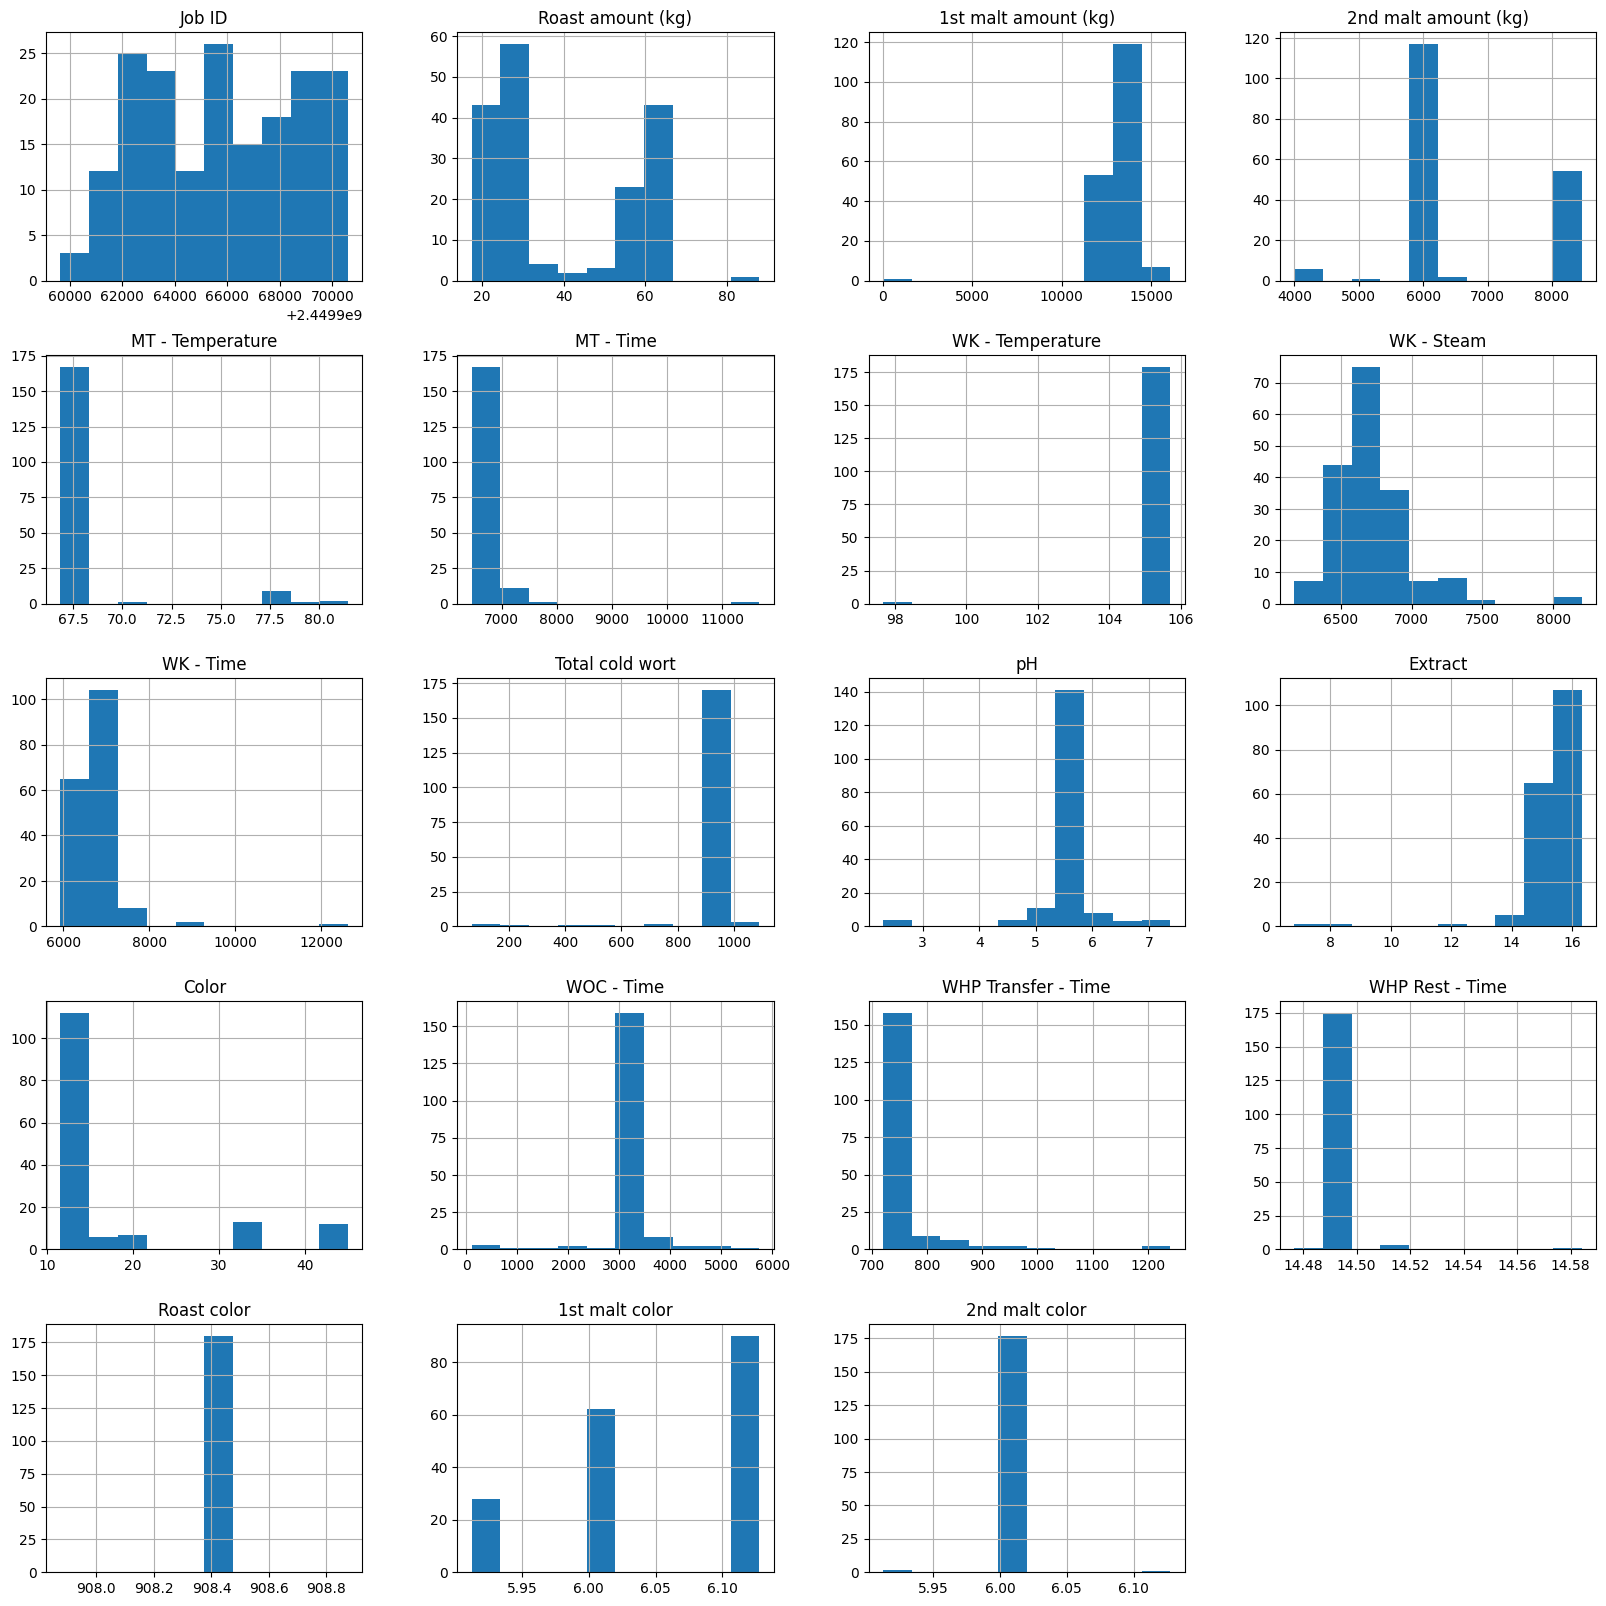

In [ ]:
data.hist(figsize=(20, 20))
plt.show()

<ipython-input-222-9f29ca6374d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


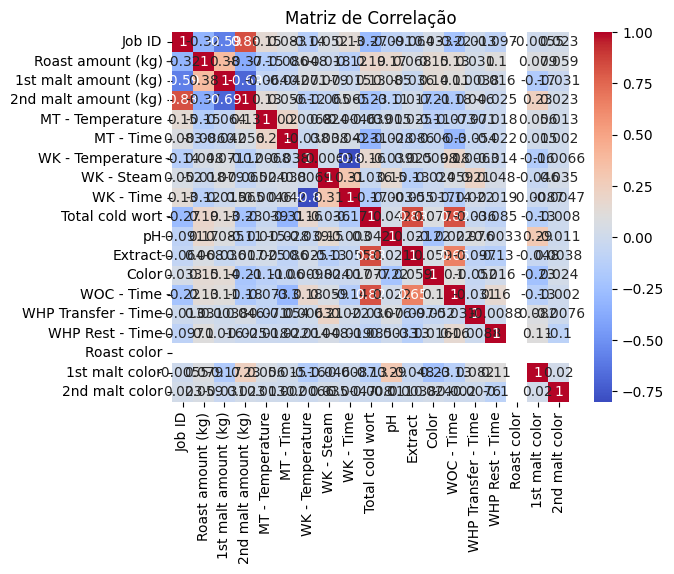

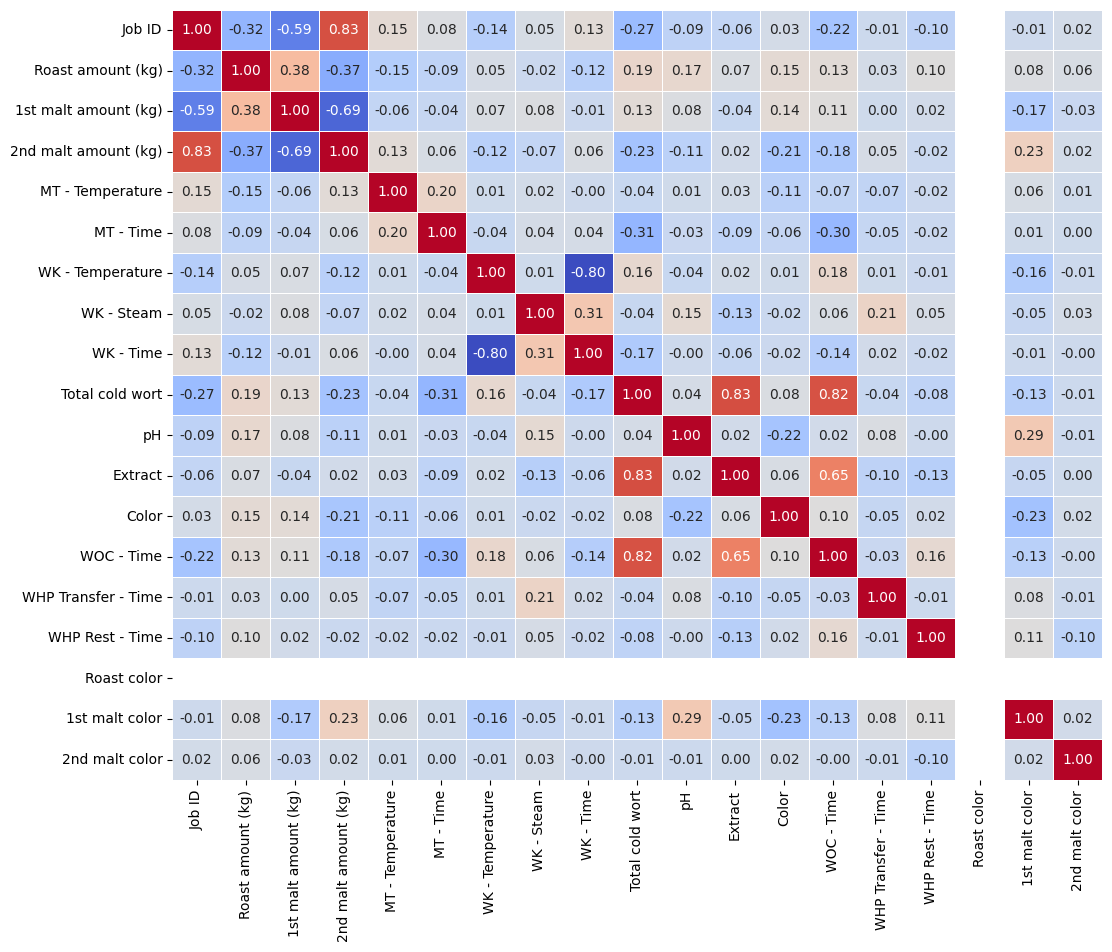

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False, xticklabels=True, yticklabels=True)
plt.show()

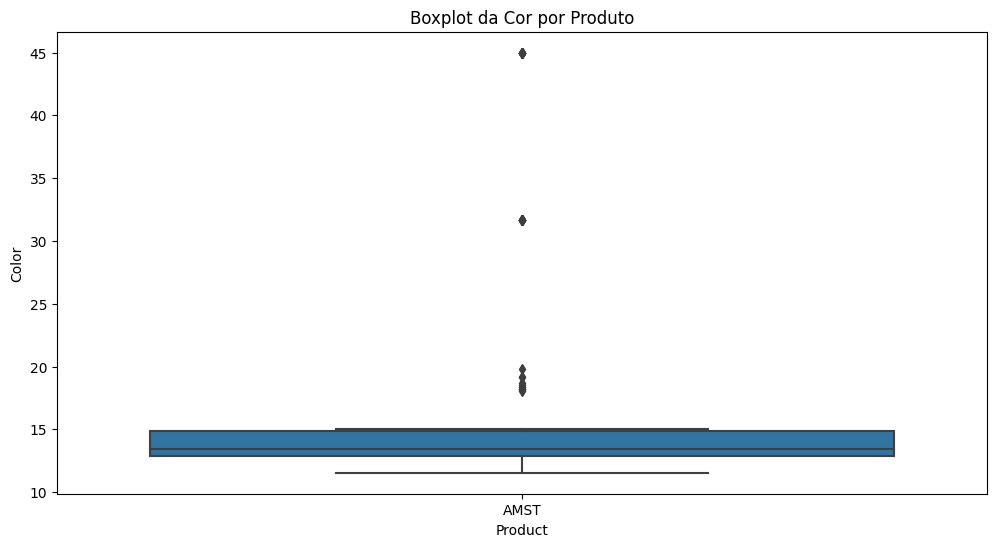

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Color', data=data)
plt.title('Boxplot da Cor por Produto')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Job ID                   0
Date/Time                0
Roast amount (kg)        3
1st malt amount (kg)     0
2nd malt amount (kg)     0
MT - Temperature         0
MT - Time                0
WK - Temperature         0
WK - Steam               0
WK - Time                0
Total cold wort          0
pH                       5
Extract                  0
Color                   30
WOC - Time               0
WHP Transfer - Time      0
WHP Rest - Time          0
Roast color              0
1st malt color           0
2nd malt color           0
Product                  0
dtype: int64


In [ ]:
median_roast_amount = data['Roast amount (kg)'].median()
data['Roast amount (kg)'].fillna(median_roast_amount, inplace=True)
median_ph = data['pH'].median()
data['pH'].fillna(median_ph, inplace=True)
median_color = data['Color'].median()
data['Color'].fillna(median_color, inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Job ID                  0
Date/Time               0
Roast amount (kg)       0
1st malt amount (kg)    0
2nd malt amount (kg)    0
MT - Temperature        0
MT - Time               0
WK - Temperature        0
WK - Steam              0
WK - Time               0
Total cold wort         0
pH                      0
Extract                 0
Color                   0
WOC - Time              0
WHP Transfer - Time     0
WHP Rest - Time         0
Roast color             0
1st malt color          0
2nd malt color          0
Product                 0
dtype: int64


In [ ]:
categorical_variables = ['Product']
for var in categorical_variables:
    unique_values = data[var].value_counts()
    print(f"Valores únicos para {var}:\n{unique_values}\n")

Valores únicos para Product:
AMST    180
Name: Product, dtype: int64



In [ ]:
scaler = StandardScaler()
numerical_features = ['Roast amount (kg)', '1st malt amount (kg)', '2nd malt amount (kg)', 'MT - Temperature', 'MT - Time', 'WK - Temperature', 'WK - Steam', 'WK - Time', 'Total cold wort', 'pH', 'Extract', 'Color', 'WOC - Time', 'WHP Transfer - Time', 'WHP Rest - Time', 'Roast color', '1st malt color', '2nd malt color']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
X = data.drop(columns=['Color'])
y = data['Color']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
correlation_with_target = data.corr()['Color'].abs().sort_values(ascending=False)


<ipython-input-231-feb82a9db94c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()['Color'].abs().sort_values(ascending=False)


In [ ]:
top_features = correlation_with_target.index[1:6]
selected_data = data[top_features]
print(selected_data.head())

   1st malt color  2nd malt amount (kg)        pH  1st malt amount (kg)  \
0        0.894659             -2.298545  2.824041              1.879928   
1        0.894659             -2.294792  2.697597              1.892110   
2        0.894659             -2.301022  2.638377              1.887774   
8        0.894659             -2.289057  0.080688              1.907314   
9        0.894659             -2.288038  0.080688              1.911237   

   Roast amount (kg)  
0           1.422542  
1           1.422545  
2           1.404517  
8           1.416537  
9           1.404517  


In [ ]:
X = selected_data
y = data['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.9973387809736818
R-squared (R2): 0.17628407048255146


In [ ]:
X = selected_data
y = data['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Mean Squared Error (MSE) - Árvore de Decisão: {mse_tree}')
print(f'R-squared (R2) - Árvore de Decisão: {r2_tree}')

Mean Squared Error (MSE) - Árvore de Decisão: 1.2014671252913574
R-squared (R2) - Árvore de Decisão: 0.007691640218948748


In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)

In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Mean Squared Error (MSE) - Gradient Boosting: {mse_gb}')
print(f'R-squared (R2) - Gradient Boosting: {r2_gb}')

Mean Squared Error (MSE) - Gradient Boosting: 0.5693914211636888
R-squared (R2) - Gradient Boosting: 0.5297317293876638


In [ ]:
X = selected_data
y = data['Color']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE) - Random Forest: {mse_rf}')
print(f'R-squared (R2) - Random Forest: {r2_rf}')

Mean Squared Error (MSE) - Random Forest: 0.6619427100909062
R-squared (R2) - Random Forest: 0.45329233643405453


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Mean Squared Error (MSE) - Melhor Random Forest: {mse_best}')
print(f'R-squared (R2) - Melhor Random Forest: {r2_best}')

Mean Squared Error (MSE) - Melhor Random Forest: 0.652327548567148
R-squared (R2) - Melhor Random Forest: 0.46123363167203835


In [ ]:
num_folds = 5

In [ ]:
rf_model = best_rf_model

In [ ]:
metrica = 'neg_mean_squared_error'

In [ ]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(rf_model, X, y, cv=kf, scoring=metrica)

In [ ]:
scores = -scores

In [ ]:
print("Pontuações de Desempenho (MSE) em cada fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

Pontuações de Desempenho (MSE) em cada fold:
Fold 1: 0.6412530007784646
Fold 2: 0.8369598938251632
Fold 3: 0.34318529850008084
Fold 4: 0.7728939513314246
Fold 5: 0.4726523214752014


In [ ]:
mean_score = scores.mean()
std_score = scores.std()
print("\nMédia das Pontuações de Desempenho (MSE):", mean_score)
print("Desvio Padrão das Pontuações de Desempenho (MSE):", std_score)


Média das Pontuações de Desempenho (MSE): 0.6133888931820669
Desvio Padrão das Pontuações de Desempenho (MSE): 0.18385811354998596
